### 전처리(Preprocessing)
* 원본 raw 데이터의 품질이 좋지 않아서 가공하여 데이터의 품질을 향상시키는 과정

#### (1) 표준화(Standardization) :  :데이터가 평균으로부터 얼마나 떨어져 있는지를 나타내는 값으로, 특정 범위를 벗어난 데이터를 이상치(outlier)로 간주하여 제거한다,  StandardScaler 사용,  Z = (X - mean())/std()

####  (2) 정규화(Normalization) : 데이터의 범위를 일치시키거나 분포를 유사하게 만들어 주는 기능, 데이터의 범위를  0~1 사이의 값으로 변환, MinMaxScaler 사용 , Z = (X - min())/(max() - min())

### 데이터 분석 절차
#### 데이터 표준화를 통해 outlier를 제거하고, 그 다음에 데이터 정규화를 하여 상대적 크기의 영향력 줄인 다음 분석을 시작한다

In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

### 표준화(Standardization) 

In [2]:
# (1) Numpy 를 이용한  표준화
# Z = (X - mean())/std()

data = np.random.randint(1000,size=(3,4)) # 0 ~ 999까지의 정수
print('raw_data:\n',data)

data_stand_np = ( data - np.mean(data,axis = 0))/ np.std(data,axis = 0)
print('numpy standardized data:\n',data_stand_np)

raw_data:
 [[ 16 246  89 162]
 [568  61 421 130]
 [304 463 636 312]]
numpy standardized data:
 [[-1.24210352 -0.06492622 -1.30217507 -0.49578081]
 [ 1.20661485 -1.19099038  0.17332706 -0.89912792]
 [ 0.03548867  1.2559166   1.12884801  1.39490873]]


In [3]:
# (2) scipy.stats 를 이용한 표준화 : zscore()
import scipy.stats as ss

data_stand_ss = ss.zscore(data)
print('scipy standardized data:\n',data_stand_ss)

scipy standardized data:
 [[-1.24210352 -0.06492622 -1.30217507 -0.49578081]
 [ 1.20661485 -1.19099038  0.17332706 -0.89912792]
 [ 0.03548867  1.2559166   1.12884801  1.39490873]]


In [4]:
# (3) sklearn.preprocessing 를 이용한 표준화
# StandardScaler().fit_transform()

from sklearn.preprocessing import StandardScaler

data_stand_skl = StandardScaler().fit_transform(data)
print('sklearn standardized data:\n',data_stand_skl)

# 동일한 구현
sc =  StandardScaler()  # 클래스의 인스턴스 생성
sc.fit(data)    
data_stand_skl = sc.transform(data)
print('sklearn standardized data:\n',data_stand_skl)

sklearn standardized data:
 [[-1.24210352 -0.06492622 -1.30217507 -0.49578081]
 [ 1.20661485 -1.19099038  0.17332706 -0.89912792]
 [ 0.03548867  1.2559166   1.12884801  1.39490873]]
sklearn standardized data:
 [[-1.24210352 -0.06492622 -1.30217507 -0.49578081]
 [ 1.20661485 -1.19099038  0.17332706 -0.89912792]
 [ 0.03548867  1.2559166   1.12884801  1.39490873]]


In [5]:
# 정규화 : 0 ~ 1
# (1) Numpy 를 이용한 정규화
# Z = (X - min())/(max() - min())
data_minmax_np = (data - np.min(data,axis = 0))/(np.max(data,axis = 0) - np.min(data,axis = 0))
print('numpy minmax data:\n',data_minmax_np)

numpy minmax data:
 [[0.         0.460199   0.         0.17582418]
 [1.         0.         0.60694698 0.        ]
 [0.52173913 1.         1.         1.        ]]


In [6]:
# (2) sklearn.preprocessing를 이용한 정규화
# MinMaxScaler().fit_transform()
from sklearn.preprocessing import MinMaxScaler

data_minmax_skl = MinMaxScaler().fit_transform(data)
print('sklearn minmax data:\n',data_minmax_skl)

# 동일한 구현
sc = MinMaxScaler()
sc.fit(data)
data_minmax_skl = sc.transform(data)
print('sklearn minmax data:\n',data_minmax_skl)
data

sklearn minmax data:
 [[0.         0.460199   0.         0.17582418]
 [1.         0.         0.60694698 0.        ]
 [0.52173913 1.         1.         1.        ]]
sklearn minmax data:
 [[0.         0.460199   0.         0.17582418]
 [1.         0.         0.60694698 0.        ]
 [0.52173913 1.         1.         1.        ]]


array([[ 16, 246,  89, 162],
       [568,  61, 421, 130],
       [304, 463, 636, 312]])

### 이상치를 제거하여 표준화 하기

raw_data:
 [ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021  0.43302619  1.20303737
 -0.96506567  1.02827408  0.22863013  0.44513761 -1.13660221  0.13513688
  1.484537   -1.07980489 -1.97772828 -1.7433723   0.26607016  2.38496733
  1.12369125  1.67262221  0.09914922  1.39799638 -0.27124799  0.61320418
 -0.26731719 -0.54930901  0.1327083  -0.47614201  1.30847308  0.19501328
  0.40020999 -0.33763234  1.25647226 -0.7319695   0.66023155 -0.35087189
 -0.93943336 -0.48933722 -0.80459114 -0.21269764 -0.33914025  0.31216994
  0.56515267 -0.14742026 -0.02590534  0.2890942  -0.53987907  0.70816002
  0.84222474  0.2035808   2.39470366  0.91745894 -0.11227247 -0.36218045
 -0.23218226 -0.5017289   1.12878515 -0.69781003 -0.08112218 -0.52929608
  1.04618286 -1.41855603 -0.36249918 -0.12190569  0.31935642  0.4609029
 -0.21578989  0.98907246  0.31475378  2.46765106 -1.50832149  0.62060066
 -1.04513254 -0.79800882  1.98508459  1.7

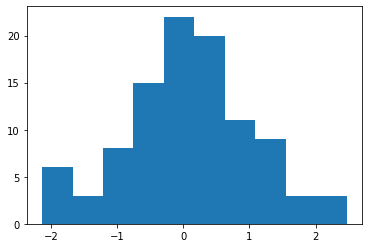

In [7]:
np.random.seed(10)
data = np.random.randn(100)  # 정규분포를 이루는 random, 100개
print('raw_data:\n',data)
print(np.min(data),np.max(data))
plt.hist(data)  # 정규성이 있다
plt.show()

insert outlier data:
 [ 1.33158650e+00  7.15278974e-01 -1.54540029e+00 -8.38384993e-03
  6.21335974e-01 -7.20085561e-01  2.65511586e-01  1.08548526e-01
  4.29143093e-03 -1.74600211e-01  4.33026190e-01  1.20303737e+00
 -9.65065671e-01  1.02827408e+00  2.28630130e-01  4.45137613e-01
 -1.13660221e+00  1.35136878e-01  1.48453700e+00 -1.07980489e+00
 -1.97772828e+00 -1.74337230e+00  2.66070164e-01  2.38496733e+00
  1.12369125e+00  1.67262221e+00  9.91492158e-02  1.39799638e+00
 -2.71247988e-01  6.13204185e-01 -2.67317189e-01 -5.49309014e-01
  1.32708296e-01 -4.76142015e-01  1.30847308e+00  1.95013279e-01
  4.00209988e-01 -3.37632337e-01  1.25647226e+00 -7.31969502e-01
  6.60231551e-01 -3.50871891e-01 -9.39433360e-01 -4.89337217e-01
 -8.04591142e-01 -2.12697639e-01 -3.39140246e-01  3.12169936e-01
  5.65152670e-01 -1.47420258e-01 -2.59053368e-02  2.89094204e-01
 -5.39879071e-01  7.08160020e-01  8.42224738e-01  2.03580797e-01
  2.39470366e+00  9.17458938e-01 -1.12272471e-01 -3.62180447e-01
 -2

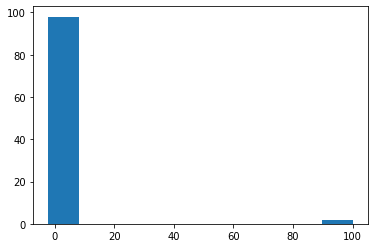

In [8]:
data[98:100] = 100
print('insert outlier data:\n',data)
print(np.min(data),np.max(data))
plt.hist(data)  # 정규성이 없다
plt.show()

standardized data:
 [[-0.05414927]
 [-0.09811235]
 [-0.25937343]
 [-0.14973341]
 [-0.10481359]
 [-0.20050124]
 [-0.13019562]
 [-0.14139227]
 [-0.14882924]
 [-0.16159012]
 [-0.11824629]
 [-0.06331907]
 [-0.21797641]
 [-0.07578546]
 [-0.13282648]
 [-0.11738235]
 [-0.23021263]
 [-0.13949564]
 [-0.04323885]
 [-0.2261611 ]
 [-0.29021269]
 [-0.27349537]
 [-0.13015577]
 [ 0.02099156]
 [-0.06897907]
 [-0.02982217]
 [-0.14206275]
 [-0.04941206]
 [-0.1684843 ]
 [-0.10539365]
 [-0.1682039 ]
 [-0.18831923]
 [-0.13966888]
 [-0.18310001]
 [-0.05579802]
 [-0.13522447]
 [-0.12058717]
 [-0.17321969]
 [-0.0595074 ]
 [-0.20134896]
 [-0.10203905]
 [-0.17416411]
 [-0.21614798]
 [-0.18404126]
 [-0.20652928]
 [-0.16430773]
 [-0.17332726]
 [-0.12686734]
 [-0.10882131]
 [-0.15965129]
 [-0.15098327]
 [-0.1285134 ]
 [-0.18764656]
 [-0.09862017]
 [-0.08905693]
 [-0.13461333]
 [ 0.02168608]
 [-0.08369024]
 [-0.15714409]
 [-0.17497079]
 [-0.16569762]
 [-0.1849252 ]
 [-0.06861571]
 [-0.19891226]
 [-0.15492205]
 [-0.

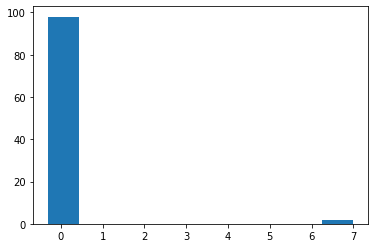

In [9]:
# sklearn사용 표준화
data.shape  # (100,)      # 1차원
data = data.reshape(-1,1) # 반드시 2차원으로 변경하여 사용, (100,1)
data_stand_skl = StandardScaler().fit_transform(data)
print('standardized data:\n',data_stand_skl)
plt.hist(data_stand_skl)
plt.show()

zooim data:
 [-0.05414927 -0.09811235 -0.25937343 -0.14973341 -0.10481359 -0.20050124
 -0.13019562 -0.14139227 -0.14882924 -0.16159012 -0.11824629 -0.06331907
 -0.21797641 -0.07578546 -0.13282648 -0.11738235 -0.23021263 -0.13949564
 -0.04323885 -0.2261611  -0.29021269 -0.27349537 -0.13015577  0.02099156
 -0.06897907 -0.02982217 -0.14206275 -0.04941206 -0.1684843  -0.10539365
 -0.1682039  -0.18831923 -0.13966888 -0.18310001 -0.05579802 -0.13522447
 -0.12058717 -0.17321969 -0.0595074  -0.20134896 -0.10203905 -0.17416411
 -0.21614798 -0.18404126 -0.20652928 -0.16430773 -0.17332726 -0.12686734
 -0.10882131 -0.15965129 -0.15098327 -0.1285134  -0.18764656 -0.09862017
 -0.08905693 -0.13461333  0.02168608 -0.08369024 -0.15714409 -0.17497079
 -0.16569762 -0.1849252  -0.06861571 -0.19891226 -0.15492205 -0.18689165
 -0.07450798 -0.25032525 -0.17499352 -0.15783126 -0.1263547  -0.11625776
 -0.1645283  -0.07858183 -0.12668302  0.02688964 -0.25672849 -0.10486604
 -0.22368782 -0.20605974 -0.00753328 -

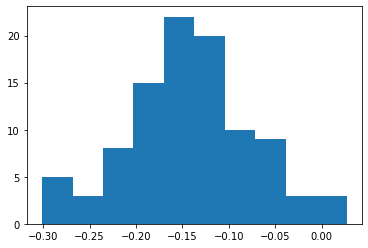

In [10]:
data_stand_skl_zoomin = data_stand_skl[data_stand_skl < 5]
print('zooim data:\n',data_stand_skl_zoomin)
plt.hist(data_stand_skl_zoomin) # 정규성이 있다
plt.show()

In [11]:
# 레이블 인코딩(Label Encoding)
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','믹서','선풍기','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('encoding 변환 값:',labels)

encoding 변환 값: [0 1 4 5 3 2 3 2]


In [12]:
print('encoding 클래스:',encoder.classes_)

encoding 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [13]:
print('decoding 원본 값:',encoder.inverse_transform([0,1,3,5,4,2,4,5]))

decoding 원본 값: ['TV' '냉장고' '선풍기' '컴퓨터' '전자렌지' '믹서' '전자렌지' '컴퓨터']


### Boston 주택 가격 예측 : 전처리

In [14]:
df = pd.read_csv('boston_train.csv')
df

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  TAX  PTRATIO  MEDV
0     2.30040   0.0  19.58  0.605  6.319  96.1  2.1000  403     14.7  23.8
1    13.35980   0.0  18.10  0.693  5.887  94.7  1.7821  666     20.2  12.7
2     0.12744   0.0   6.91  0.448  6.770   2.9  5.7209  233     17.9  26.6
3     0.15876   0.0  10.81  0.413  5.961  17.5  5.2873  305     19.2  21.7
4     0.03768  80.0   1.52  0.404  7.274  38.3  7.3090  329     12.6  34.6
..        ...   ...    ...    ...    ...   ...     ...  ...      ...   ...
395   0.23912   0.0   9.69  0.585  6.019  65.3  2.4091  391     19.2  21.2
396   0.04560   0.0  13.89  0.550  5.888  56.0  3.1121  276     16.4  23.3
397   1.38799   0.0   8.14  0.538  5.950  82.0  3.9900  307     21.0  13.2
398   7.36711   0.0  18.10  0.679  6.193  78.1  1.9356  666     20.2  11.0
399   0.14150   0.0   6.91  0.448  6.169   6.6  5.7209  233     17.9  25.3

[400 rows x 10 columns]

In [15]:
# 전처리 : 표준화
df_stand = StandardScaler().fit_transform(df)
# df_minmax = MinMaxScaler().fit_transform(df_stand)

df = pd.DataFrame(df_stand,columns=df.columns)
df

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0   -0.171556 -0.483311  1.171334  0.424507  0.060120  0.947403 -0.786047   
1    1.010703 -0.483311  0.959979  1.185594 -0.535048  0.898253 -0.937184   
2   -0.403848 -0.483311 -0.638040 -0.933342  0.681464 -2.324588  0.935411   
3   -0.400500 -0.483311 -0.081090 -1.236047 -0.433098 -1.812023  0.729268   
4   -0.413443  2.924037 -1.407774 -1.313885  1.375827 -1.081793  1.690430   
..        ...       ...       ...       ...       ...       ...       ...   
395 -0.391909 -0.483311 -0.241035  0.251533 -0.353192 -0.133899 -0.639094   
396 -0.412596 -0.483311  0.358758 -0.051172 -0.533671 -0.460396 -0.304872   
397 -0.269094 -0.483311 -0.462387 -0.154957 -0.448253  0.452391  0.112502   
398  0.370079 -0.483311  0.959979  1.064512 -0.113471  0.315473 -0.864206   
399 -0.402345 -0.483311 -0.638040 -0.933342 -0.146536 -2.194692  0.935411   

          TAX   PTRATIO      MEDV  
0   -0.050476 -1.758773  0.122848  
1    1.483792  0.791013 -1.038165  
2   -1.042209 -0.275261  0.415716  
3   -0.622181  0.327416 -0.096803  
4   -0.482172 -2.732328  1.252482  
..        ...       ...       ...  
395 -0.120481  0.327416 -0.149101  
396 -0.791359 -0.970657  0.070550  
397 -0.610513  1.161891 -0.985867  
398  1.483792  0.791013 -1.215978  
399 -1.042209 -0.275261  0.279741  

[400 rows x 10 columns]

In [16]:
# 전처리 : 정규화
df_minmax = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(df_minmax,columns=df.columns)
df

CRIM   ZN     INDUS       NOX        RM       AGE       DIS  \
0    0.025785  0.0  0.700880  0.452675  0.528454  0.959835  0.088243   
1    0.150090  0.0  0.646628  0.633745  0.445679  0.945417  0.059335   
2    0.001361  0.0  0.236437  0.129630  0.614869  0.000000  0.417509   
3    0.001713  0.0  0.379399  0.057613  0.459858  0.150360  0.378079   
4    0.000352  0.8  0.038856  0.039095  0.711439  0.364573  0.561922   
..        ...  ...       ...       ...       ...       ...       ...   
395  0.002617  0.0  0.338343  0.411523  0.470971  0.642636  0.116351   
396  0.000441  0.0  0.492302  0.339506  0.445871  0.546859  0.180278   
397  0.015530  0.0  0.281525  0.314815  0.457751  0.814624  0.260110   
398  0.082734  0.0  0.646628  0.604938  0.504311  0.774459  0.073293   
399  0.001519  0.0  0.236437  0.129630  0.499713  0.038105  0.417509   

          TAX   PTRATIO      MEDV  
0    0.412214  0.223404  0.417778  
1    0.914122  0.808511  0.171111  
2    0.087786  0.563830  0.480000  
3    0.225191  0.702128  0.371111  
4    0.270992  0.000000  0.657778  
..        ...       ...       ...  
395  0.389313  0.702128  0.360000  
396  0.169847  0.404255  0.406667  
397  0.229008  0.893617  0.182222  
398  0.914122  0.808511  0.133333  
399  0.087786  0.563830  0.451111  

[400 rows x 10 columns]

[[-0.31450286  0.09078551 -0.07194825 -0.23116539  0.7031658  -0.09497612
  -0.44238091  0.00500088 -0.2263518 ]] [0.44962935]


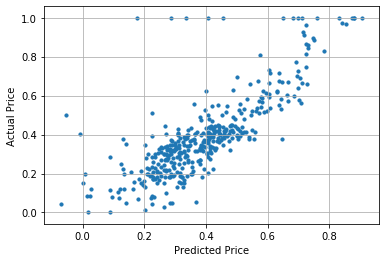

RMSE: 0.12785502011806624
r2_score: 0.637849985054999


In [17]:
# 다차원(다항, 피쳐가 2 개 이상) 회귀 모델
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x = df.iloc[:,:-1]   # 9개 컬럼을 피쳐로 사용  , (400,9)
# y = df['MEDV'].values.reshape(-1,1)          # (400,1)
y = df.iloc[:,-1:] 

# 클래스의 인스턴스 생성
lr = LinearRegression()

# 학습
lr.fit(x,y)

# 회귀 계수
print(lr.coef_,lr.intercept_)  # weight 이 9개가 생성, bias는 1개 , H(x1...x9) = W1*x1 + W2*x2 ....+ W9*x9 + b


# 예측
y_pred = lr.predict(x)

# 시각화
plt.scatter(y_pred,y,s=10)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.grid(True)
plt.show()

# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)    # 제곱근
print('RMSE:',rmse)    # RMSE: 0.12785502011806624 , RMSE가 감소

r2 = r2_score(y,y_pred)
print('r2_score:',r2)  # r2_score: 0.637849985054999

## 앙상블 모델 사용 : 결정 트리기반

In [18]:
df = pd.read_csv('boston_train.csv')
x = df.iloc[:,:-1]               # 9개 컬럼을 피쳐로 사용  , (400,9)
y = df['MEDV'].values            # (400,1)
# y = df.iloc[:,-1:] 

### RandomForestRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,random_state=0)

rf.fit(x,y)

y_pred = rf.predict(x)

In [20]:
# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)    # 제곱근
print('RMSE:',rmse)    # RMSE: 1.7317771332867868 , LinearRegression 보다 감소, 정확도가 증가

r2 = r2_score(y,y_pred)
print('r2_score:',r2)  # r2_score: 0.9671895707796678, LinearRegression 보다 증가, 정확도가 증가

RMSE: 1.7317771332867868
r2_score: 0.9671895707796678


### XGBRegressor

In [21]:
# 사이킷런의 래퍼 : XGBRegressor 
#  early_stopping_rounds=400 : 조기 중단 반복 값

# !pip install XGBRegressor
from xgboost import XGBRegressor
X_test,y_test = x,y
X_train,y_train = x,y

evals = [(X_test,y_test)]

xgb_wrapper = XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=400,eval_set=evals,
               eval_metric='rmse', verbose=True)
y_pred = xgb_wrapper.predict(X_test)

[0]	validation_0-rmse:21.84370
Will train until validation_0-rmse hasn't improved in 400 rounds.
[1]	validation_0-rmse:19.81568
[2]	validation_0-rmse:17.99740
[3]	validation_0-rmse:16.36960
[4]	validation_0-rmse:14.89697
[5]	validation_0-rmse:13.57208
[6]	validation_0-rmse:12.39708
[7]	validation_0-rmse:11.35147
[8]	validation_0-rmse:10.40381
[9]	validation_0-rmse:9.55481
[10]	validation_0-rmse:8.79851
[11]	validation_0-rmse:8.12908
[12]	validation_0-rmse:7.54437
[13]	validation_0-rmse:7.01170
[14]	validation_0-rmse:6.54889
[15]	validation_0-rmse:6.14220
[16]	validation_0-rmse:5.77109
[17]	validation_0-rmse:5.43815
[18]	validation_0-rmse:5.15685
[19]	validation_0-rmse:4.86338
[20]	validation_0-rmse:4.63641
[21]	validation_0-rmse:4.36953
[22]	validation_0-rmse:4.19635
[23]	validation_0-rmse:4.01448
[24]	validation_0-rmse:3.87042
[25]	validation_0-rmse:3.72403
[26]	validation_0-rmse:3.62040
[27]	validation_0-rmse:3.50650
[28]	validation_0-rmse:3.40963
[29]	validation_0-rmse:3.33230
[30]	

[258]	validation_0-rmse:1.16760
[259]	validation_0-rmse:1.16290
[260]	validation_0-rmse:1.16119
[261]	validation_0-rmse:1.15859
[262]	validation_0-rmse:1.15478
[263]	validation_0-rmse:1.15062
[264]	validation_0-rmse:1.14454
[265]	validation_0-rmse:1.14081
[266]	validation_0-rmse:1.14005
[267]	validation_0-rmse:1.13595
[268]	validation_0-rmse:1.13284
[269]	validation_0-rmse:1.12990
[270]	validation_0-rmse:1.12921
[271]	validation_0-rmse:1.12786
[272]	validation_0-rmse:1.12583
[273]	validation_0-rmse:1.12165
[274]	validation_0-rmse:1.12083
[275]	validation_0-rmse:1.11906
[276]	validation_0-rmse:1.11684
[277]	validation_0-rmse:1.11230
[278]	validation_0-rmse:1.11116
[279]	validation_0-rmse:1.10995
[280]	validation_0-rmse:1.10846
[281]	validation_0-rmse:1.10586
[282]	validation_0-rmse:1.10527
[283]	validation_0-rmse:1.09754
[284]	validation_0-rmse:1.09559
[285]	validation_0-rmse:1.08817
[286]	validation_0-rmse:1.08333
[287]	validation_0-rmse:1.07858
[288]	validation_0-rmse:1.07323
[289]	va

In [22]:
# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)    
print('RMSE:',rmse)    

r2 = r2_score(y,y_pred)
print('r2_score:',r2)  

RMSE: 0.767660835104087
r2_score: 0.9935528662747737


### LGBMRegressor

In [23]:
# !pip install lightgbm
from lightgbm import LGBMRegressor

X_test,y_test = x,y
X_train,y_train = x,y

evals = [(X_test,y_test)]

lgbm_wrapper = LGBMRegressor(n_estimators=400)
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=400,
                eval_metric='rmse', eval_set=evals,verbose=True)
y_pred = lgbm_wrapper.predict(X_test)

[1]	training's rmse: 8.86528	training's l2: 78.5931
Training until validation scores don't improve for 400 rounds
[2]	training's rmse: 8.25747	training's l2: 68.1858
[3]	training's rmse: 7.72704	training's l2: 59.7072
[4]	training's rmse: 7.23683	training's l2: 52.3717
[5]	training's rmse: 6.83591	training's l2: 46.7297
[6]	training's rmse: 6.47633	training's l2: 41.9428
[7]	training's rmse: 6.17994	training's l2: 38.1917
[8]	training's rmse: 5.91518	training's l2: 34.9894
[9]	training's rmse: 5.6785	training's l2: 32.2453
[10]	training's rmse: 5.46864	training's l2: 29.906
[11]	training's rmse: 5.27278	training's l2: 27.8022
[12]	training's rmse: 5.08266	training's l2: 25.8334
[13]	training's rmse: 4.92934	training's l2: 24.2984
[14]	training's rmse: 4.7937	training's l2: 22.9796
[15]	training's rmse: 4.6578	training's l2: 21.6951
[16]	training's rmse: 4.53873	training's l2: 20.6
[17]	training's rmse: 4.42882	training's l2: 19.6144
[18]	training's rmse: 4.32705	training's l2: 18.7233


[173]	training's rmse: 1.55296	training's l2: 2.41167
[174]	training's rmse: 1.54584	training's l2: 2.38961
[175]	training's rmse: 1.5404	training's l2: 2.37284
[176]	training's rmse: 1.53296	training's l2: 2.34997
[177]	training's rmse: 1.52648	training's l2: 2.33014
[178]	training's rmse: 1.52007	training's l2: 2.31061
[179]	training's rmse: 1.51461	training's l2: 2.29404
[180]	training's rmse: 1.51	training's l2: 2.28009
[181]	training's rmse: 1.50556	training's l2: 2.2667
[182]	training's rmse: 1.4989	training's l2: 2.24669
[183]	training's rmse: 1.49267	training's l2: 2.22805
[184]	training's rmse: 1.48272	training's l2: 2.19845
[185]	training's rmse: 1.47726	training's l2: 2.1823
[186]	training's rmse: 1.4714	training's l2: 2.16502
[187]	training's rmse: 1.46649	training's l2: 2.15059
[188]	training's rmse: 1.46174	training's l2: 2.13669
[189]	training's rmse: 1.4574	training's l2: 2.12403
[190]	training's rmse: 1.45219	training's l2: 2.10885
[191]	training's rmse: 1.44595	traini

[327]	training's rmse: 0.949582	training's l2: 0.901706
[328]	training's rmse: 0.947457	training's l2: 0.897675
[329]	training's rmse: 0.944651	training's l2: 0.892366
[330]	training's rmse: 0.942286	training's l2: 0.887903
[331]	training's rmse: 0.939976	training's l2: 0.883555
[332]	training's rmse: 0.935298	training's l2: 0.874783
[333]	training's rmse: 0.932216	training's l2: 0.869026
[334]	training's rmse: 0.929743	training's l2: 0.864422
[335]	training's rmse: 0.927971	training's l2: 0.86113
[336]	training's rmse: 0.92679	training's l2: 0.858939
[337]	training's rmse: 0.924498	training's l2: 0.854697
[338]	training's rmse: 0.921763	training's l2: 0.849647
[339]	training's rmse: 0.91944	training's l2: 0.84537
[340]	training's rmse: 0.917794	training's l2: 0.842346
[341]	training's rmse: 0.91641	training's l2: 0.839807
[342]	training's rmse: 0.91481	training's l2: 0.836878
[343]	training's rmse: 0.911939	training's l2: 0.831632
[344]	training's rmse: 0.909269	training's l2: 0.82677

In [24]:
# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)    
print('RMSE:',rmse)    

r2 = r2_score(y,y_pred)
print('r2_score:',r2)  

RMSE: 0.7933348571160713
r2_score: 0.9931144127922703
